In [2]:
import os
os.chdir("/content/drive/MyDrive/MADE/Project/deap")

In [ ]:
import glob
import pickle
data = []
labels = []
data_dir = './data_preprocessed_python'
files = glob.glob(os.path.join(data_dir, "*.dat"))

for file_data in files:
    raw_data = pickle.load(open(file_data, 'rb'), encoding='latin1')
    data.append(raw_data['data'])
    labels.append(raw_data['labels'])

In [69]:
print(data[0].shape)

(40, 40, 8064)


In [8]:
labels_bin = []
for i in range(32):
  temp = labels[i] > 4.5
  #print(labels[i])
  #print(temp)
  labels_bin.append(temp)
  #break
labels_all_bin = np.vstack(labels_bin)  

In [70]:
import numpy as np
raw_peri_sigs = np.zeros((32, 40, 56448))
for sub in range(32):
  for nvideo in range(40):
      for i,  ncanal in enumerate(range(33, 40)):#range(33, 40):
          #raw_peri_sigs[sub, nvideo].extend(data[0][nvideo, ncanal, :])
          
          
          raw_peri_sigs[sub, nvideo, i * 8064 : i * 8064 + 8064 ] = data[sub][nvideo, ncanal, :]
#raw_peri_sigs = np.array(raw_peri_sigs)

In [28]:
print(raw_peri_sigs.shape)

(32, 40, 56448)


In [14]:
type_emotion = 0

In [32]:
data_for_videos = raw_peri_sigs

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn import svm
import pandas as pd
k = 10
emotion = ['valence', 'arousal']

for i_em in range(1):
            
            train_indexes = []
            test_indexes = []
            for j in range(32):
                    # labels_common.append([np.mean(labels_all_bin[:, i_em][i::NVIDEOS]) > 0.5 for i in range(NVIDEOS)])
                train_indexes.append([])    
                test_indexes.append([])    
                X = np.arange(40)
                y = np.array(labels_bin[j][:, i_em])
                skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
                #kf = KFold(n_splits=k, random_state=None, shuffle=True)
                for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
                #for fold, (train_index, test_index) in enumerate(kf.split(X)):
                    train_indexes[-1].append(train_index)
                    test_indexes[-1].append(test_index)

            # f1_data = pd.DataFrame(columns = range(k), index = range(32))
            # acc_data = pd.DataFrame(columns = range(k), index = range(32))

            # for fold in range(k):
            #     f1_sub = []
            #     acc_sub = []
            #     for i in range(32):
            #           #print( labels_subject_train[i])
            #           data_subject_train = data_for_videos[i][train_indexes[i][fold]]
            #           labels_subject_train = labels_bin[i][:, i_em][train_indexes[i][fold]]
            #           data_subject_test = data_for_videos[i][test_indexes[i][fold]]
            #           labels_subject_test = labels_bin[i][:, i_em][test_indexes[i][fold]]
                      
                    
            #           model =  svm.SVC()#RandomForestClassifier(100)
            #           #print(X_train)
            #           model.fit(data_subject_train ,  labels_subject_train)#
            #           labels_predicted_sub = model.predict(data_subject_test)
            #           print(labels_predicted_sub, labels_subject_test)
            #           #print(labels_predicted_sub, labels_subject_test)
            #           f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, labels_subject_test, average = 'binary'))
            #           acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, labels_subject_test))  
            #           print(f1_data.loc[i, fold], acc_data.loc[i, fold])
            #     print("************")
            # print(f"{emotion[i_em]}  f1 =  {(f1_data.values.mean(axis = 1))}")
            # print(f"{emotion[i_em]}  acc = {(acc_data.values.mean(axis = 1))}")
            # print("\n")




# X = np.arange(40)
# y = np.array(labels_bin[0][:, type_emotion])
# k = 10

# skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
# f1_data = pd.DataFrame(columns = range(k), index = range(32))
# acc_data = pd.DataFrame(columns = range(k), index = range(32))
# i = 0
# for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
#        X_train, X_test = raw_peri_sigs[train_index], raw_peri_sigs[test_index]
#        y_train, y_test = y[train_index], y[test_index]
#        print(train_index, test_index)
#        model =  RandomForestClassifier(100)
#        model.fit(X_train,  y_train)#
#        labels_predicted_sub = model.predict(X_test)
#        f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, y_test, average = 'macro'))
#        acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, y_test))  
#        print( f1_data.loc[i, fold] , acc_data.loc[i, fold])




/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,


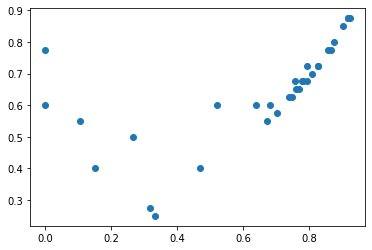

In [56]:
import matplotlib 
from matplotlib import pyplot as plt

f1 = f1_data.values.mean(axis = 1)
acc = acc_data.values.mean(axis = 1)

plt.scatter(f1, acc)

In [41]:
print(f"  f1 =  {np.mean(f1_data.values.mean(axis = 1))}")
print(f" acc = {np.mean(acc_data.values.mean(axis = 1))}")
print("\n")

  f1 =  0.4816517857142857
 acc = 0.61953125




In [75]:
  data_subject_train_all = []
  labels_subject_train_all = []
  data_subject_test_all  = []
  labels_subject_test_all  = []


  k = 10
  i_em = 0

  f1_data_all = pd.DataFrame(index = range(k), columns = ['f1_binary_1', 'f1_binary_0', 'f1_macro'])
  acc_data_all = pd.DataFrame(index = range(k), columns = ['acc'])
  for fold in range(k):
      data_subject_train_all = []
      labels_subject_train_all = []
      data_subject_test_all  = []
      labels_subject_test_all  = []
      f1_sub = []
      acc_sub = []
      for i in range(32):
                      #print( labels_subject_train[i])
                      data_subject_train_all.extend(data_for_videos[i][train_indexes[i][fold]])
                      labels_subject_train_all.extend(labels_bin[i][:, i_em][train_indexes[i][fold]])
                      data_subject_test_all.extend(data_for_videos[i][test_indexes[i][fold]])
                      labels_subject_test_all.extend(labels_bin[i][:, i_em][test_indexes[i][fold]])
                      
                    
      model =  RandomForestClassifier(100)
      #print(X_train)
      model.fit(data_subject_train_all ,  labels_subject_train_all)#
      labels_predicted_sub_all = model.predict(data_subject_test_all)
      #print(labels_predicted_sub, labels_subject_test)
      #print(labels_predicted_sub, labels_subject_test)
      f1_data_all.loc[fold, 'f1_binary_1'] = (f1_score(labels_predicted_sub_all, labels_subject_test_all, average = 'binary', pos_label = 1))
      f1_data_all.loc[fold, 'f1_binary_0'] = (f1_score(labels_predicted_sub_all, labels_subject_test_all, average = 'binary', pos_label = 0))
      f1_data_all.loc[fold, 'f1_macro'] = (f1_score(labels_predicted_sub_all, labels_subject_test_all, average = 'macro'))

      
      acc_data_all.loc[fold, 'acc'] = (accuracy_score(labels_predicted_sub_all, labels_subject_test_all))  
      print(f1_data_all.loc[fold, 'f1_binary_1'], f1_data_all.loc[fold, 'f1_binary_0'], f1_data_all.loc[fold, 'f1_macro'], acc_data_all.loc[fold, 'acc'])
      
  print("************")
  print(f"{emotion[i_em]}  f1 =  {(np.mean(f1_data_all.values.mean(axis = 0)))}")
  print(f"{emotion[i_em]}  acc = {(np.mean(acc_data_all.values.mean(axis = 0)))}")
  print("\n")

0.7761194029850746 0.18181818181818182 0.47896879240162826 0.6484375
0.8019801980198019 0.2592592592592593 0.5306197286395307 0.6875
0.781725888324873 0.27118644067796616 0.5264561645014196 0.6640625
0.7853403141361257 0.36923076923076925 0.5772855416834475 0.6796875
0.7715736040609136 0.23728813559322035 0.504430869827067 0.6484375
0.7614213197969545 0.20338983050847456 0.48240557515271454 0.6328125
0.7083333333333334 0.125 0.4166666666666667 0.5625
0.71875 0.15625 0.4375 0.578125
0.7127659574468085 0.20588235294117646 0.4593241551939925 0.578125
0.7027027027027027 0.22535211267605634 0.46402740768937956 0.5703125
************
valence  f1 =  0.48776849017558455
valence  acc = 0.625




In [76]:
  print(f"{emotion[i_em]}  f1 =  {((f1_data_all.values.mean(axis = 0)))}")
  print(f"{emotion[i_em]}  acc = {((acc_data_all.values.mean(axis = 0)))}")
  print("\n")

valence  f1 =  [0.7520712720806587 0.22346570827051043 0.48776849017558466]
valence  acc = [0.625]




In [63]:
print(f1_data_all)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [58]:
print(len(data_subject_train_all))

11520


In [37]:
X = np.arange(40)
y = np.array(labels_bin[0][:, type_emotion])
k = 10

skf = StratifiedKFold(n_splits=k, random_state=None, shuffle=True)
f1_data = pd.DataFrame(columns = range(k), index = range(32))
acc_data = pd.DataFrame(columns = range(k), index = range(32))
i = 0
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
       X_train, X_test = raw_peri_sigs[0][train_index], raw_peri_sigs[0][test_index]
       y_train, y_test = y[train_index], y[test_index]
       print(train_index, test_index)
       model =  RandomForestClassifier(100)
       model.fit(X_train,  y_train)#
       labels_predicted_sub = model.predict(X_test)
       f1_data.loc[i, fold] = (f1_score(labels_predicted_sub, y_test, average = 'macro'))
       acc_data.loc[i, fold] =  (accuracy_score(labels_predicted_sub, y_test))  
       print( f1_data.loc[i, fold] , acc_data.loc[i, fold])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25
 26 27 28 29 30 31 32 33 34 35 38 39] [15 22 36 37]
0.7333333333333334 0.75
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 22 23 25 26
 27 28 29 30 32 33 34 35 36 37 38 39] [ 9 21 24 31]
0.5 0.5
[ 0  1  2  3  5  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 35 36 37 38 39] [ 4  6  8 34]
0.2 0.25
[ 0  2  4  5  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39] [ 1  3 12 13]
0.5 0.5
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 18 19 20 21 22 23 24 26
 27 28 30 31 32 33 34 35 36 37 38 39] [11 17 25 29]
0.5 0.5
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 15 16 17 18 19 21 22 23 24 25 26
 27 28 29 30 31 32 34 35 36 37 38 39] [ 5 14 20 33]
0.5 0.5
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 28 29 30 31 32 33 34 36 37 38] [23 27 35 39]
0.7333333333333334 0.75
[ 0  1  3  4  5  6  7  8  9 10 11 12